In [ ]:
#pip install yfinance
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Collecting and Normalizing Data

I started off by gathering stock prices from Yahoo! Finance's API for Apple specifically for the range of 1/1/2022 - 1/1/2023. Once I had that data, I proceeded to normalize it in order to prepare it for PCA. 

In [ ]:
#Getting the historical stock prices from Yahoo! Finance's API for Apple
start_date = '2022-01-01'
end_date = '2023-01-01'
apple_stock = yf.download('AAPL', start=start_date, end=end_date)
apple_stock

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669998,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943970,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225037,86709100
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339417,85438400


In [ ]:
apple_stock = apple_stock.dropna()
normalized = (apple_stock - apple_stock.mean()) / apple_stock.std()
normalized

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1.762783,2.007530,1.908650,2.081401,2.069027,0.700745
2022-01-04,2.130232,2.012168,2.016216,1.904472,1.890238,0.481888
2022-01-05,1.899045,1.798059,1.674442,1.538359,1.520270,0.280138
2022-01-06,1.370071,1.421631,1.445575,1.314708,1.294268,0.380168
2022-01-07,1.384616,1.331968,1.399039,1.327729,1.307424,-0.050779
...,...,...,...,...,...,...
2022-12-23,-1.828267,-1.892794,-1.758561,-1.759721,-1.753285,-1.018535
2022-12-27,-1.793052,-1.970862,-1.828746,-1.899886,-1.895746,-0.799027
2022-12-28,-1.923957,-2.000234,-2.046170,-2.205490,-2.206359,-0.104492


# Testing for Optimal Number of Components

I created an initial PCA model with n_components = 2, but before proceeding with creating the plots, I wanted to verify whether 2 was truly the best option for n_components by running tests using the elbow method and looking at the silhouette scores. 

In [ ]:
pca = PCA(n_components=2)
pca.fit_transform(normalized)

array([[-4.35937720e+00,  9.04392403e-01],
       [-4.42420874e+00,  6.84554157e-01],
       [-3.75285959e+00,  4.57102496e-01],
       [-3.04116856e+00,  5.18244006e-01],
       [-3.01816560e+00,  8.51083182e-02],
       [-2.69644260e+00,  9.21510065e-01],
       [-3.24825700e+00, -3.46740010e-01],
       [-3.61706379e+00, -3.92512197e-01],
       [-3.23393423e+00,  7.18455361e-03],
       [-3.02907589e+00, -1.80519379e-01],
       [-2.68918542e+00,  2.49348536e-01],
       [-2.21557180e+00,  3.96638228e-01],
       [-1.89241875e+00,  2.39207780e-01],
       [-1.41972377e+00,  1.54072958e+00],
       [-7.39926560e-01,  3.18785196e+00],
       [-7.63316266e-01,  1.21800390e+00],
       [-1.00932897e+00,  9.14320909e-01],
       [-9.11407657e-01,  1.48439651e+00],
       [-2.05388302e+00,  3.99337330e+00],
       [-3.02661711e+00,  1.31106699e+00],
       [-3.29309836e+00,  7.53433266e-02],
       [-3.47626289e+00,  2.89430789e-02],
       [-3.22712995e+00,  2.12160638e-01],
       [-2.

1: 1500.0000000000005
2: 577.1170519116092
3: 405.69909908317743
4: 300.02486749523837
5: 242.76113421356027
6: 203.47726128406646
7: 175.14411198755886
8: 155.1603782466852


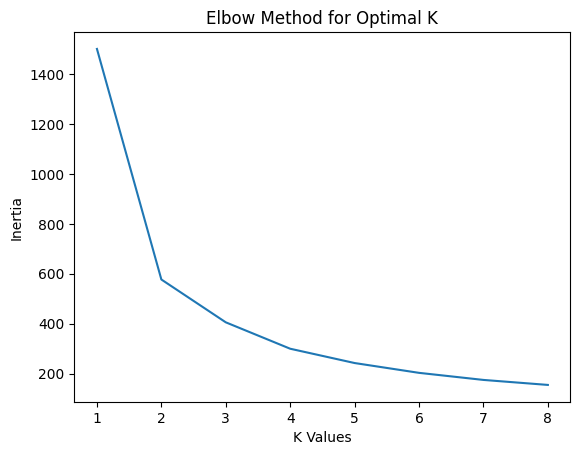

In [ ]:
section = normalized
inertias = []
map = {}
K = range(1, 9)
for k in K:
  kmeans = KMeans(n_clusters = k, random_state=42, n_init= 10).fit(section)
  inertias.append(kmeans.inertia_)
  map[k] = kmeans.inertia_
for key, val in map.items():
  print(f'{key}: {val}')
plt.plot(K, inertias)
plt.xlabel('K Values')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

We can see here that the elbow has the steepest dip at the k value of 2 so based on the elbow method, the optimal number of components is 2. 

In [ ]:
section = normalized
compare_score = -1
best_k = 0
for k in range(2, 9):
    kmeans = KMeans(n_clusters = k, random_state=42, n_init= 10).fit(section)
    s_score = silhouette_score(section, kmeans.labels_)
    print(str(k) + ": " + str(s_score))
    if (s_score > compare_score):
        best_k = k
        compare_score = s_score
print("The best choice for k is:" + str(best_k))

2: 0.5139806569262709
3: 0.41447720867233323
4: 0.42308321606322147
5: 0.4002375640829948
6: 0.3898420302677947
7: 0.3525420844452345
8: 0.34182954715849734
The best choice for k is:2


Looking at the silhouette scores as well, we can see that the second cluster had the highest silhouette score so it lined up with the elbow method in concluding that the best choice is 2. 

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained Variance Ratio: ', explained_variance_ratio)

Explained Variance Ratio:  [0.8271914  0.16580857]


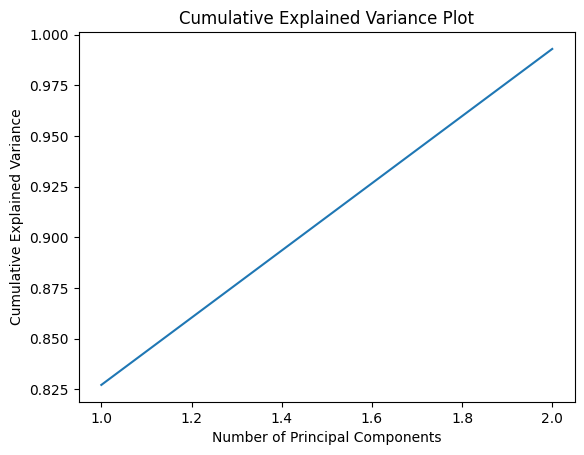

array([0.8271914 , 0.99299998])

In [ ]:
cumsum_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumsum_variance) + 1), cumsum_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()
cumsum_variance

The cumulative explained variance plot helps us visualize the amount of variance that is explained by each principal component and can help us understand the cumulative contribution of components. In other words, it's another tool used to decide how many principal components to retain for a PCA. Typically, we want to retain enough components that would explain a significant percentage of the total variance, which we can see that with 2 components, it retains 99% of the variance and thus this plot also concludes that 2 is the optimal number of components. 

# PCA

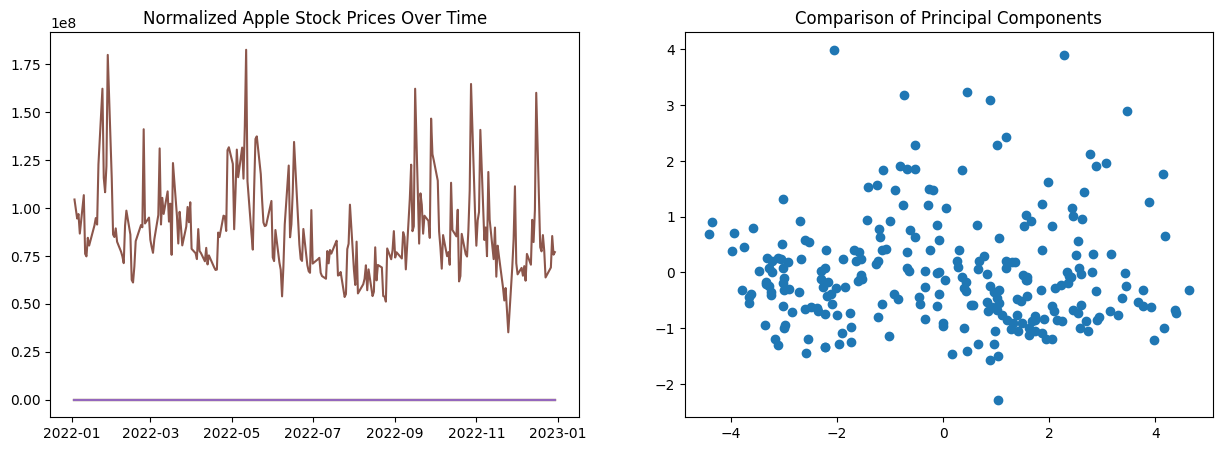

In [ ]:
n_components = 2
pca = PCA(n_components=n_components)
# Fit the PCA model to your data
pca.fit(normalized)

# Transform the data to its principal components
transformed_data = pca.transform(normalized)

# Plotting the original data and the transformed data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(apple_stock)
ax1.set_title('Normalized Apple Stock Prices Over Time')

ax2.scatter(transformed_data[:, 0], transformed_data[:, 1])
ax2.set_title('Comparison of Principal Components')

plt.show()

# Using PCA to Determine Best Features

In [ ]:
print("Principal Components:\n", pca.components_)

Principal Components:
 [[-0.44484027 -0.44720319 -0.44804396 -0.44682493 -0.44679314  0.04589569]
 [ 0.02233367  0.05848244 -0.02166821  0.02464016  0.01876223  0.99732259]]


From this, we can tell which of the original features impacted the principal components the most. The first row (i.e. the first principal component) is a linear combination of the original features with their corresponding weights. When analyzing pca.components_, we analyze the magnitude, sign, relative importance, and whether or not there are any zero coefficients. the larger the magnitude of a coefficient, the higher the influence the original feature contributed to the principal component. The signs of the coefficients tell us what kind of directional relationship there is between the original feature and the principal component (e.g. positive coefficients mean positive correlations, while negative coefficients represent negative correlations). Relative importance looks at absolute values of coefficients and the larger the absolute coefficient is, the more weight it carries in determining the principal component. Zero coefficients mean that the corresponding original feature doesn't have any influence on the principal component, but we see none here so we don't have to worry about that. 

Looking at our results, we can analyze it based on the two rows. Each row is a linear combination of the original features with their corresponding weights for the principal component. Out of all the features in the first row, only the last one has a positive value, meaning the corresponding feature, Volume, was the only one to have a positive influence on the first principal component, whereas everything else had a relatively similar amount of negative influence on the principal component. The second principal component represented by the second row had less negative influences from the features, except for the third feature, Low. Volume has the highest magnitude and absolute coefficient so it had the highest influence and carried the most weight in determining the principal component. Based on that, volume contributes most to the PCA representation and would be the best to use for predictions.

However, this was done as further data exploration and was unfortunately not incorporated into the other predictions due to lack of time.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f86dace4-c215-40df-9ea2-a63cc39cfa4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>